## Lesson-01 Assignment

#### 今天是2019年9月28日，今天世界上又多了一名AI工程师 :) 

`各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。`

## 本次作业的内容

#### 1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

In [1]:
import random
import jieba
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice

In [2]:
%matplotlib inline

In [3]:
hello_rules = '''
say_hello = names hello tail 
names = name names | name
name = Jhon | Mike | 老梁 | 老刘 
hello = 你好 | 您来啦 | 快请进
tail = 呀 | ！
'''

In [4]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => Adj | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的"""

In [5]:
def generate(grammar_rule, target):
    if target in grammar_rule: # names 
        candidates = grammar_rule[target]  # ['name names', 'name']
        candidate = random.choice(candidates) #'name names', 'name'
        return ''.join(generate(grammar_rule, target=c.strip()) for c in candidate.split())
    else:
        return target

In [6]:
def get_generation_by_gram(grammar_str: str, target, stmt_split='=', or_split='|'):

    rules = dict() 
    for line in grammar_str.split('\n'):
        if not line: continue
        stmt, expr = line.split(stmt_split)
    
        rules[stmt.strip()] = expr.split(or_split)
    
    generated = generate(rules, target=target)
    
    return generated

In [7]:
get_generation_by_gram(simple_grammar, target='sentence', stmt_split='=>')

'一个蓝色的小小的桌子坐在一个好看的好看的蓝色的女人'

In [8]:
simpel_programming = '''
if_stmt => if ( cond ) { stmt }
cond => var op var
op => | == | < | >= | <= 
stmt => assign | if_stmt
assign => var = var
var =>  char var | char
char => a | b |  c | d | 0 | 1 | 2 | 3
'''

In [9]:
for i in range(20):
    print(get_generation_by_gram(simpel_programming, target='if_stmt', stmt_split='=>'))

if(1bd==a22){0a=a}
if(2==2ca){1dc=a}
if(b23<=0c0){2a0=1}
if(31d){if(3b==1d){bd03=3d}}
if(32b){2=d3}
if(d1==3){if(2>=c){b31=c}}
if(b==2){d1=cd}
if(3==1ad){if(3d<=1){if(3c0==a){bd=b23}}}
if(c<a){if(dc3){ad=1}}
if(31bb<d1){202a1c=23}
if(0==ac){if(d==db1cc){d=3acc}}
if(b2<3){if(a2==a){c=1a}}
if(0==cca){d=c}
if(2==ba120a){2=3}
if(ba<=3){if(01<=db){if(b2){1=3d0cc1a20}}}
if(330<=c){1bd=c}
if(dcbb<=aad03){if(10b<a){if(01){if(a0da==2){if(ad2==ad){if(d103){c=abaa0}}}}}}
if(acdbc3d1){if(23<=b22c){2=1}}
if(a<=d){c3=c}
if(1==2){if(ab<c){if(b==d){d=12}}}


In [10]:
corpus = '/home/xuetaozhang/kaikeba/1.1/article_9k.txt'

In [11]:
FILE = open(corpus).read()

In [12]:
def generate_by_pro(text_corpus, length=20):
    return ''.join(random.sample(text_corpus, length))

In [13]:
len(FILE)

33425826

In [14]:
def cut(string):
    return list(jieba.cut(string))

In [15]:
TOKENS = cut(FILE)

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


#### 2. 请回答以下问题

回答以下问题，并将问题发送至 minchuian.gao@gmail.com 中：
```
    2.1. what do you want to acquire in this course？
    2.2. what problems do you want to solve？
    2.3. what’s the advantages you have to finish you goal?
    2.4. what’s the disadvantages you need to overcome to finish you goal?
    2.5. How will you plan to study in this course period?
```

In [16]:
words_count = Counter(TOKENS) 

In [17]:
words_with_fre = [f for w, f in words_count.most_common()]

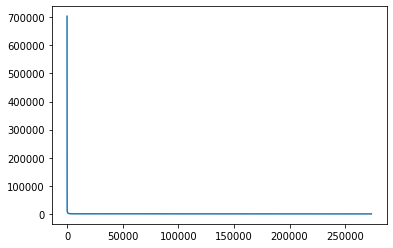

In [18]:
plt.plot(words_with_fre)

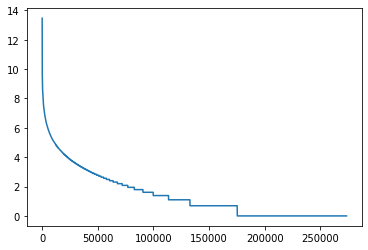

In [19]:
plt.plot(np.log(words_with_fre))

In [20]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]

In [21]:
_2_gram_word_counts = Counter(_2_gram_words)

In [22]:
words_count.most_common()[-1][-1]

1

In [23]:
def get_1_gram_count(word):
    if word in words_count: return words_count[word]
    else:
        return words_count.most_common()[-1][-1]

In [24]:
def get_2_gram_count(word):
    if word in _2_gram_word_counts: return _2_gram_word_counts[word]
    else:
        return _2_gram_word_counts.most_common()[-1][-1]

In [25]:
def get_gram_count(word, wc):
    if word in wc: return wc[word]
    else:
        return wc.most_common()[-1][-1]

In [26]:
def two_gram_model(sentence):
    # 2-gram langauge model
    tokens = cut(sentence)
    
    probability = 1
    
    for i in range(len(tokens)-1):
        word = tokens[i]
        next_word = tokens[i+1]
        
        _two_gram_c = get_gram_count(word+next_word, _2_gram_word_counts)
        _one_gram_c = get_gram_count(next_word, words_count)
        pro =  _two_gram_c / _one_gram_c
        
        probability *= pro
    
    return probability

In [27]:
two_gram_model('此外自本周6月12日起除小米手机6等15款机型')

4.741787766101897e-37

In [28]:
two_gram_model('前天早上吃晚饭的时候')

6.239387998125227e-10

In [29]:
two_gram_model('前天早上吃早饭的时候')

2.3509374521948863e-13

In [30]:
two_gram_model('这个人来自秦华大学')

4.607121764623602e-10

In [31]:
two_gram_model('这个人来自清华大学')

1.364629466681511e-07

#### 3. 如何提交
代码 + 此 jupyter 相关，提交至自己的 github 中(**所以请务必把GitHub按照班主任要求录入在Trello中**)；
第2问，请提交至minchuian.gao@gmail.com邮箱。
#### 4. 作业截止时间
此次作业截止时间为 2019.10.8日

#### 5. 完成以下问答和编程练习

>

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: 电商推荐系统；电子相册自动分类；语音识别；天猫精灵智能音响； 

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: 使用github托管自己的代码，也会在github上找一些优秀的开源项目源码；jupyter 的交互性好，适合做数据预处理和一些探索性的数据分析；pycharm适合做大型工程项目的开发。我目前使用较多的是VIM.

#### 2. What's the Probability Model?

Ans:概率模型是用来描述不同随机变量之间关系的数学模型，通常情况下刻画了一个或多个随机变量之间的相互非确定性的概率关系。从数学上讲，该模型通常被表达 $(Y,P)$ ，其中 $Y$ 是观测集合用来描述可能的观测结果，$P$ 是 $Y$ 对应的概率分布函数集合。若使用概率模型，一般而言需假设存在一个确定的分布 $P$ 生成观测数据 $Y$ 。因此通常使用统计推断的办法确定集合 $P$ 中谁是数据产生的原因。
概率模型分为生成式模型和判别式模型



#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans: 机器翻译，语言识别，自动评论生成，聊天机器人，问答系统等场景下都会用到概率模型

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:基于概率统计的方法在有大量数据，场景复杂，对准确率要求较高的场景中有更好的效果，并且具有一定的泛化能力。传统基于语法分析和模式匹配的方法在这些复杂的场景下由于不能列举所有情况导致效果不如基于概率的方法。

#### 5. What's the Language Model;

Ans:对于语言序列$w_1,w_2,w_3 \dots w_n$ ,语言模型就是计算该序列的概率 $P(w_1,w_2,w_3 \dots w_n)$

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:机器翻译，chatbot,自动评论生成，语音识别等场景。

#### 7. What's the 1-gram language model;

Ans:首先由连式法则可以得到 

$$P(w_1,w_2,\dots,w_n) = P(w_1)P(w_2|w_1)\dots P(w_n|w_1,\dots,w_{n-1})$$


在统计语言模型中，采用极大似然估计计算每个词出现的条件概率，即

$$P(w_i|w_1,\dots,w_{i-1}) = \frac{C(w_1,w_2,\dots,w_i)}{C(w_1,w_2,\dots,w_{i-1})}$$

在自然语言处理中，对任意长的自然语句直接跟进这个公式计算概率显然不现实，因为会导致很多句子概率为0。为了解决这个问题，引入马尔科夫假设，即假设当前词出现的概率只依赖前面$n-1$个词，可以得到

$$P(w_i|w_1,w_2,\dots,w_{i-1}) = P(w_i|w_{i-n+1},\dots,w_{i-1})$$

基于上式，定义n-gram语言模型如下：

n = 1;  $P(w_1,w_2,\dots,w_n) = \prod_{i=1}^{n}P(w_i)$

n = 2;  $P(w_1,w_2,\dots,w_n) = \prod_{i=1}^{n}P(w_i|w_{i-1})$

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:1-gram模型参数较少，计算速度快，但是没有考虑到词和词间的顺序关系

#### 9. What't the 2-gram models;

Ans:n = 2;  $P(w_1,w_2,\dots,w_n) = \prod_{i=1}^{n}P(w_i|w_{i-1})$

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1569578233461&di=4adfa7597fb380e7cc0e67190bbd7605&imgtype=0&src=http%3A%2F%2Fs1.sinaimg.cn%2Flarge%2F006eYYfyzy76cmpG3Yb1f)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [32]:
student = '''
student = 自己 动作 目的 课程详情 结尾
自己 = 我 | 咱 | 俺
动作 = 想 | 考虑 | 希望 | 寻思
目的 = 学习 | 了解 | 研究
课程详情 = 大数据 | nlp | cv | 产品经理
结尾 = 课程
'''

In [33]:
get_generation_by_gram(student, target='student', stmt_split='=')

'咱想了解产品经理课程'

第二个语法：

In [34]:
teacher = '''
teacher = 寒暄 自我介绍 询问 业务相关 语气词 留下 联系方式 结尾
自我介绍 = 我是 职称 姓名 ,
职称 = 课程顾问 | 销售代表 | 班主任 | 客服
姓名 = 张老师 | 王老师 | 徐老师
寒暄 = 称谓 打招呼 , | 打招呼 ,
称谓 = 人称 ,
人称 = 同学 | 学员
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 目的 具体业务
目的 = 了解 | 学习
具体业务 =  大数据分析课程| 自然语言处理课程 | 计算机视觉课程 | 产品经理课程
语气词 = 吗？
留下 = 请留下 | 欢迎留下
联系方式 = 姓名:_______|QQ:______
结尾 = 谢谢!
'''

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [35]:
get_generation_by_gram(teacher, target='teacher', stmt_split='=')

'你好,我是班主任徐老师,请问你要学习自然语言处理课程吗？欢迎留下姓名:_______谢谢!'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [36]:
def generate_n(n):
    for i in range(n):
        print(get_generation_by_gram(student, target='student', stmt_split='='))
        print(get_generation_by_gram(teacher, target='teacher', stmt_split='='))
        print('\n')

In [37]:
generate_n(5)

俺寻思学习nlp课程
学员,您好,我是销售代表王老师,请问你要学习大数据分析课程吗？请留下QQ:______谢谢!


咱想研究cv课程
你好,我是课程顾问王老师,您需要学习大数据分析课程吗？欢迎留下QQ:______谢谢!


俺想学习产品经理课程
你好,我是销售代表王老师,请问你要学习大数据分析课程吗？欢迎留下姓名:_______谢谢!


我考虑学习大数据课程
同学,您好,我是销售代表徐老师,您需要学习计算机视觉课程吗？请留下姓名:_______谢谢!


俺希望了解大数据课程
学员,你好,我是销售代表张老师,请问你要学习自然语言处理课程吗？欢迎留下QQ:______谢谢!




#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [107]:
path_movie = '/home/xuetaozhang/kaikeba/homework/01/movie_comments.csv'
pre_movie_file = open('/home/xuetaozhang/kaikeba/homework/01/pre_movie_comments.csv', 'w')

In [ ]:
with open(path_movie) as movie_file:
    i = 0
    for line in movie_file.readlines():
        i += 1
        if len(line.split(',')) == 5 and i != 1:
            pre_movie_file.write(line.split(',')[3] + '\n')


In [108]:
path_train = '/home/xuetaozhang/kaikeba/homework/01/train.txt'
pre_train = open('/home/xuetaozhang/kaikeba/homework/01/pre_train.txt', 'w')

In [ ]:
with open(path_train) as train_file:
    for line in train_file.readlines():
        pre_train.write(line.split('++$++')[2].strip() + '\n')


In [38]:
with open('/home/xuetaozhang/kaikeba/homework/01/pre_movie_comments.csv') as pre_movie:
    movie = pre_movie.read()

with open('/home/xuetaozhang/kaikeba/homework/01/pre_train.txt') as pre_train:
    train = pre_train.read()


In [39]:
corpus = movie + train

In [40]:
print(len(movie))
print(len(train))
print(len(corpus))


30935699
179072
31114771


In [41]:
TOKENS = cut(corpus)
words_count = Counter(TOKENS)


In [42]:
_2_gram_words = [
    TOKENS[i] + TOKENS[i+1] for i in range(len(TOKENS)-1)
]


In [43]:
_2_gram_word_counts = Counter(_2_gram_words)

In [44]:
print(two_gram_model('此外自本周6月12日起除小米手机6等15款机型'))
print(two_gram_model('前天早上吃晚饭的时候'))
print(two_gram_model('前天早上吃早饭的时候'))
print(two_gram_model('我请你吃火锅'))
print(two_gram_model('这个人来自清华大学'))
print(two_gram_model('这个人来自秦华大学'))



3.420908593322386e-05
1.1090962529183096e-05
1.1090962529183096e-05
0.0012254901960784314
0.0031152647975077876
0.0007788161993769469


> 

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [1]:
sorted([1, 3, 5, 2])
IPython.display.clear_output()

[1, 2, 3, 5]

NameError: name 'IPython' is not defined

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [15]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [16]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [17]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

In [45]:
all_corpus = []
def generate_best(grammar_str, target, n):
    for i in range(n):
        gen_sentence = get_generation_by_gram(grammar_str, target)
        prob = two_gram_model(gen_sentence)
        all_corpus.append((gen_sentence, prob))
    all_corpus_sorted = sorted(all_corpus, key = lambda x : x[1], reverse = True)
    return all_corpus_sorted[0][0]


In [49]:
best_sentence = generate_best(simple_grammar, 'sentence', 50)
print(best_sentence)


>>这个小小的>小小的篮球>看见>这个>小小的桌子


好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:用到的规则比较简单，即使用概率大小做了筛选，得到的结果还是不好。提升的方法有，改2-gram为3-gram,或者对语法规则进行优化。

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


#### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf 
2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)